In [1]:
import pandas as pd
import numpy as np
# from yahoo_fin import options
import yfinance as yf
from datetime import datetime, timedelta
from datetime import date
from dateutil.parser import parse # 데이트 형식 자동변환
from copy import copy
# import openpyxl
# from openpyxl.utils.dataframe import dataframe_to_rows
from math import ceil
#from more_itertools import locate
import math
import matplotlib.pyplot as plt # 그래프
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import FinanceDataReader as fdr
from tqdm import tqdm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import openpyxl
from openpyxl.utils.dataframe import dataframe_to_rows
import random

In [2]:
nasdaq = pd.DataFrame(yf.download(tickers='^IXIC', period='max')[['Adj Close','Volume']]) #3y
nasdaq.rename(columns = {'Adj Close':'price'},inplace=True)

today = nasdaq.index[-1]#.date()
year1 = today - timedelta(days=250)
# year3 = today - timedelta(days=1100)
# year10 = today - timedelta(days=3600)
# month1 = today + timedelta(weeks=6)

nasdaq

[*********************100%***********************]  1 of 1 completed


,price,Volume
Date,,
1971-02-05,100.000000,0
1971-02-08,100.839996,0
1971-02-09,100.760002,0
1971-02-10,100.690002,0
1971-02-11,101.449997,0
...,...,...
2023-03-20,11675.540039,4970630000
2023-03-21,11860.110352,4829870000
2023-03-22,11669.959961,4981590000


In [3]:
nasdaq.tail(20)

,price,Volume
Date,,
2023-02-27,11466.980469,4494000000
2023-02-28,11455.540039,5340950000
2023-03-01,11379.480469,4927530000
2023-03-02,11462.980469,5313760000
2023-03-03,11689.009766,5102210000
2023-03-06,11675.740234,4982880000
2023-03-07,11530.330078,5422820000
2023-03-08,11576.000000,5085970000
2023-03-09,11338.349609,5061790000


오늘(230317) 기준 20일.
1. 로그 수익률
2. 100시작 데이터
3. 2번 데이터, 거래량

In [4]:
# 로그 수익률
nasdaq['return'] = pd.DataFrame(np.log(nasdaq.price/nasdaq.price.shift(1)) * 100)
nasdaq

,price,Volume,return
Date,,,
1971-02-05,100.000000,0,NaN
1971-02-08,100.839996,0,0.836488
1971-02-09,100.760002,0,-0.079359
1971-02-10,100.690002,0,-0.069496
1971-02-11,101.449997,0,0.751952
...,...,...,...
2023-03-20,11675.540039,4970630000,0.386426
2023-03-21,11860.110352,4829870000,1.568464
2023-03-22,11669.959961,4981590000,-1.616268


In [5]:
# 누적 수익률
nasdaq['cumsum'] = np.cumsum(nasdaq['return'])
nasdaq

,price,Volume,return,cumsum
Date,,,,
1971-02-05,100.000000,0,NaN,NaN
1971-02-08,100.839996,0,0.836488,0.836488
1971-02-09,100.760002,0,-0.079359,0.757129
1971-02-10,100.690002,0,-0.069496,0.687633
1971-02-11,101.449997,0,0.751952,1.439585
...,...,...,...,...
2023-03-20,11675.540039,4970630000,0.386426,476.008115
2023-03-21,11860.110352,4829870000,1.568464,477.576579
2023-03-22,11669.959961,4981590000,-1.616268,475.960311


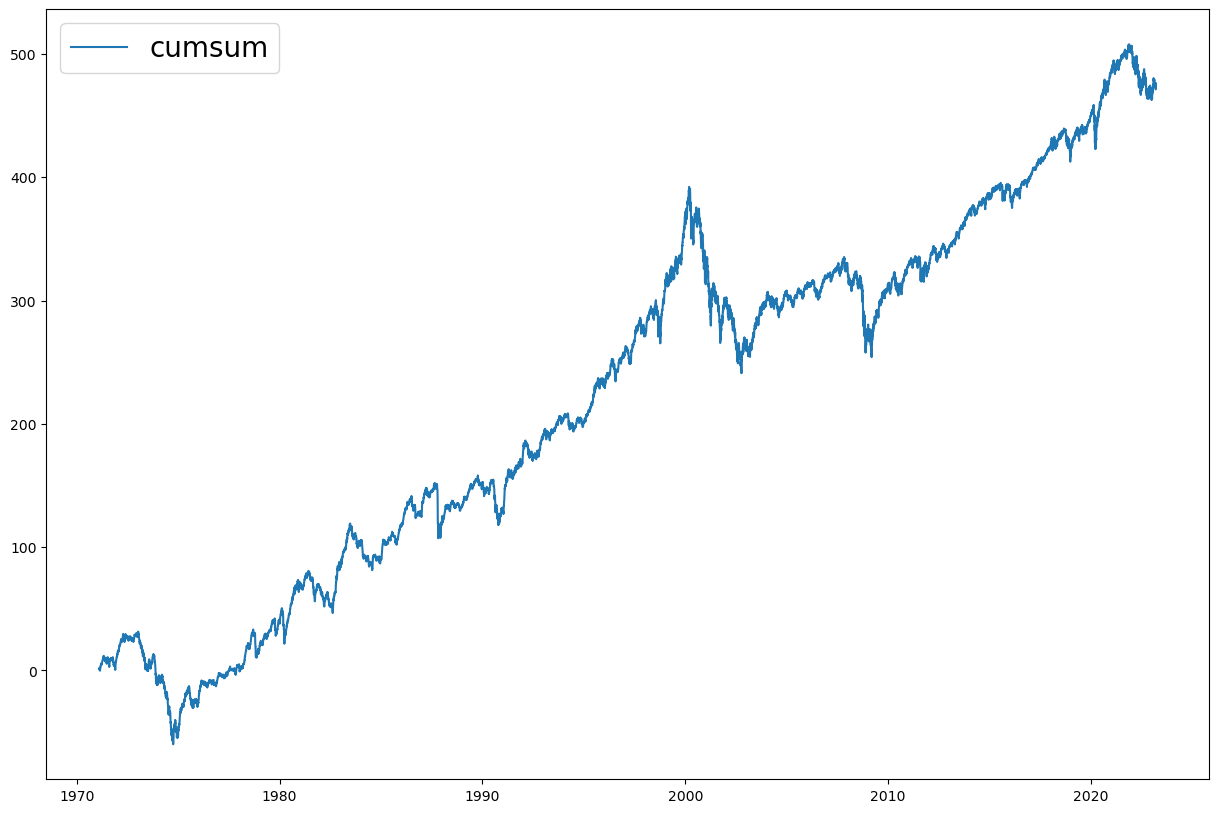

In [6]:
# 누적 수익률 그래프
plt.figure(figsize=(15,10))
plt.plot(nasdaq.index, nasdaq['cumsum'], label='cumsum')
plt.legend(fontsize=20)

#### 타겟 데이터 및 랜덤 데이터

In [7]:
# 랜덤 index 값 설정
if __name__ == '__main__':
    start = 0   # 포함한
    end = len(nasdaq)-21    # 포함한
    n = 20      # size
    
    x = [random.randint(start, end) for _ in range(n)]
    print(x)

[3116, 8666, 2386, 10849, 9218, 2230, 6795, 1246, 8183, 10480, 4423, 305, 5403, 12891, 6898, 2225, 4505, 3934, 6802, 9227]


In [8]:
nasdaq

,price,Volume,return,cumsum
Date,,,,
1971-02-05,100.000000,0,NaN,NaN
1971-02-08,100.839996,0,0.836488,0.836488
1971-02-09,100.760002,0,-0.079359,0.757129
1971-02-10,100.690002,0,-0.069496,0.687633
1971-02-11,101.449997,0,0.751952,1.439585
...,...,...,...,...
2023-03-13,11188.839844,6201490000,0.447428,471.750193
2023-03-14,11428.150391,5533120000,2.116281,473.866474
2023-03-15,11434.049805,5912430000,0.051608,473.918082


In [9]:
# 랜덤 index 데이터 추출
cases_return = pd.DataFrame()
nasdaq_a = nasdaq.reset_index()
for i in range(len(x)):
    a = list(nasdaq.iloc[x[i]:(x[i]+20)]['return'])
    cases_return = cases_return.T.append(pd.DataFrame(a).T).T

col = []
for i in range(20):
    col.append('case_'+str(i))
cases_return.columns = col
# vol = vol[["case4", "case5", "case6", "case7", "case8"]]
# vol[:108]
cases_return

C:\Users\2020 LG 울트라북\AppData\Local\Temp\ipykernel_10616\392336843.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases_return = cases_return.T.append(pd.DataFrame(a).T).T
C:\Users\2020 LG 울트라북\AppData\Local\Temp\ipykernel_10616\392336843.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases_return = cases_return.T.append(pd.DataFrame(a).T).T
C:\Users\2020 LG 울트라북\AppData\Local\Temp\ipykernel_10616\392336843.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cases_return = cases_return.T.append(pd.DataFrame(a).T).T
C:\Users\2020 LG 울트라북\AppData\Local\Temp\ipykernel_10616\392336843.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

,case_0,case_1,case_2,case_3,case_4,case_5,case_6,case_7,case_8,case_9,case_10,case_11,case_12,case_13,case_14,case_15,case_16,case_17,case_18,case_19
0,-0.536185,0.208820,0.779551,1.129568,-1.625306,0.770501,-0.689832,1.445466,3.383723,1.032614,-0.906859,0.135579,-0.356637,1.317740,-1.502086,0.685123,0.453640,-0.316209,-0.880840,-2.394876
1,0.079971,-0.415171,0.287832,1.680106,-0.316097,0.764610,0.787140,0.131462,1.485389,0.462625,-1.494721,0.112833,-0.580218,2.028958,0.169140,0.437976,0.372042,0.552707,-1.173852,2.469418
2,0.796208,-0.338232,-0.405562,0.539280,2.177603,0.305580,1.710202,0.678452,0.057242,-0.012356,0.158397,-0.838026,-0.065688,-0.399390,0.756216,0.069337,-0.159280,-0.684755,-0.395216,0.083461
3,0.887434,0.808785,0.017676,1.028400,0.142016,0.324914,1.777984,0.508787,-1.824888,-0.291365,-0.026383,-0.806884,1.980828,1.934849,-0.881497,-0.277658,-0.319314,-1.705797,-3.421332,1.203506
4,0.623745,-0.671994,0.058863,0.244038,0.505378,-0.094658,0.339350,0.200434,1.047614,0.208760,-1.301305,0.061126,0.855313,-1.328676,-1.818137,0.651289,0.000000,-0.647250,0.289623,1.296459
5,0.622977,0.288481,-0.170810,0.932963,1.241615,0.458928,0.709424,0.058870,1.197572,-0.661657,0.426783,0.068718,0.951811,1.915375,0.853340,0.770501,-0.266880,-0.760465,2.233461,-0.927782
6,1.375416,0.003870,0.229648,0.078968,-0.435769,0.309269,0.792911,-0.389213,-0.091789,0.535348,0.132996,0.243964,-0.996178,-0.158950,-1.111851,0.764610,-0.321203,-3.749919,0.461432,0.320678
7,-0.119525,0.283781,0.609826,0.675368,1.367248,0.709031,-0.880840,0.753476,-0.299327,0.110692,0.265463,-0.894876,-0.031956,1.301374,1.573942,0.305580,-0.053637,-1.856931,-0.109822,-1.877272
8,-0.454862,0.683468,0.739690,-0.818491,-0.601019,0.352639,-1.173852,-0.246608,-2.899222,0.128447,0.053003,-0.631992,-1.028050,1.827443,0.730122,0.324914,0.053637,-0.259851,1.017388,-0.257174
9,0.408856,0.045951,-0.302205,0.696014,-2.394876,-0.559477,-0.395216,-0.341560,0.615291,0.131531,-0.985225,-0.441667,0.028706,-1.220652,0.271655,-0.094658,0.747863,-0.638048,1.729180,1.487830


20


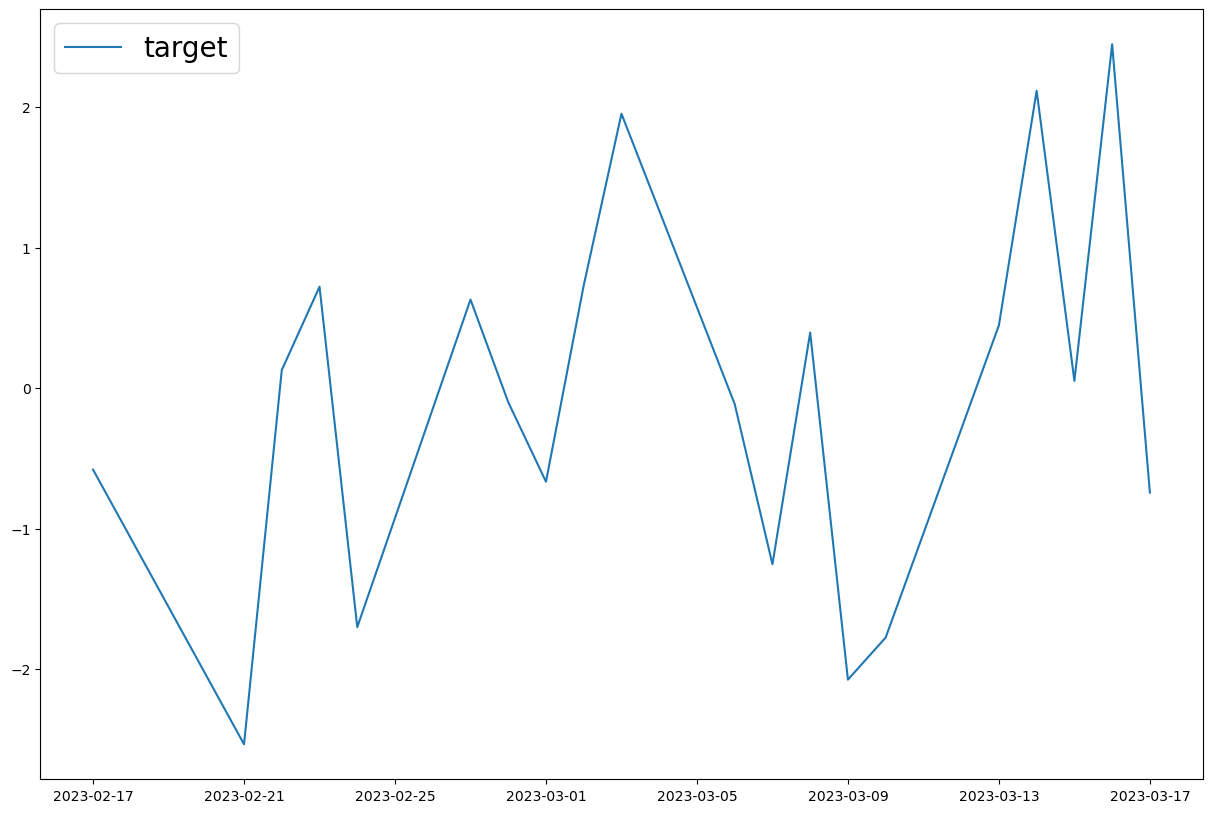

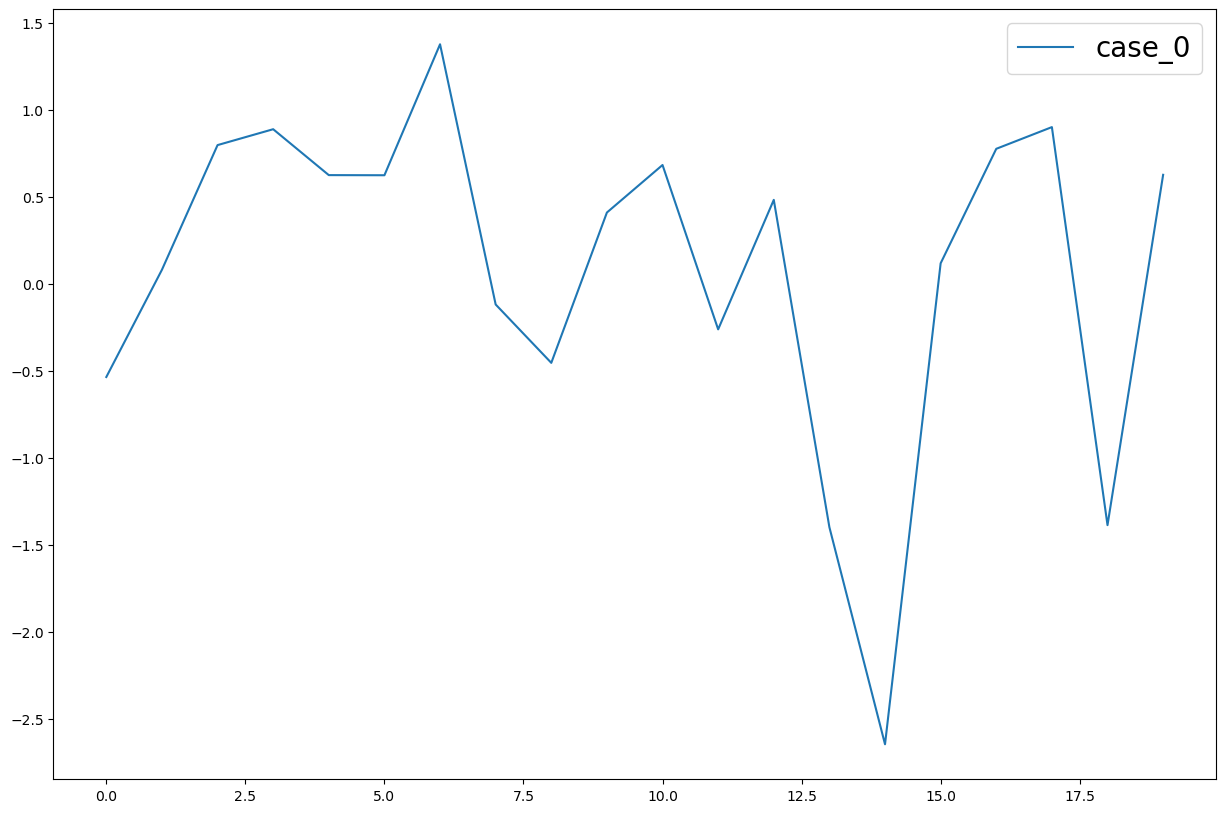

In [10]:
# 로그 수익률 그래프
plt.figure(figsize=(15,10))
plt.plot(nasdaq.tail(20).index, nasdaq.tail(20)['return'], label='target')
plt.legend(fontsize=20)

plt.figure(figsize=(15,10))
plt.plot(cases_return.index, cases_return['case_0'], label='case_0')
plt.legend(fontsize=20)
print(len(cases_return.index))

In [11]:
nasdaq.tail(20)

,price,Volume,return,cumsum
Date,,,,
2023-02-17,11787.269531,4925230000,-0.579964,476.960519
2023-02-21,11492.299805,5002540000,-2.534287,474.426232
2023-02-22,11507.070312,4671270000,0.128443,474.554675
2023-02-23,11590.400391,4714580000,0.721555,475.276230
2023-02-24,11394.940430,4432650000,-1.700777,473.575453
2023-02-27,11466.980469,4494000000,0.630221,474.205673
2023-02-28,11455.540039,5340950000,-0.099818,474.105855
2023-03-01,11379.480469,4927530000,-0.666168,473.439687
2023-03-02,11462.980469,5313760000,0.731098,474.170785


In [12]:
target_return = np.array(nasdaq.tail(20)['return'])
print(len(target_return))
target_return

20


array([-0.57996405, -2.53428669,  0.12844273,  0.72155467, -1.7007768 ,
        0.63022069, -0.09981826, -0.66616845,  0.73109786,  1.95263108,
       -0.11358592, -1.25322433,  0.39530277, -2.07432387, -1.77481936,
        0.4474282 ,  2.11628051,  0.05160846,  2.446897  , -0.74329011])

In [13]:
cases_return['target'] = target_return
cases_return

,case_0,case_1,case_2,case_3,case_4,case_5,case_6,case_7,case_8,case_9,...,case_11,case_12,case_13,case_14,case_15,case_16,case_17,case_18,case_19,target
0,-0.536185,0.208820,0.779551,1.129568,-1.625306,0.770501,-0.689832,1.445466,3.383723,1.032614,...,0.135579,-0.356637,1.317740,-1.502086,0.685123,0.453640,-0.316209,-0.880840,-2.394876,-0.579964
1,0.079971,-0.415171,0.287832,1.680106,-0.316097,0.764610,0.787140,0.131462,1.485389,0.462625,...,0.112833,-0.580218,2.028958,0.169140,0.437976,0.372042,0.552707,-1.173852,2.469418,-2.534287
2,0.796208,-0.338232,-0.405562,0.539280,2.177603,0.305580,1.710202,0.678452,0.057242,-0.012356,...,-0.838026,-0.065688,-0.399390,0.756216,0.069337,-0.159280,-0.684755,-0.395216,0.083461,0.128443
3,0.887434,0.808785,0.017676,1.028400,0.142016,0.324914,1.777984,0.508787,-1.824888,-0.291365,...,-0.806884,1.980828,1.934849,-0.881497,-0.277658,-0.319314,-1.705797,-3.421332,1.203506,0.721555
4,0.623745,-0.671994,0.058863,0.244038,0.505378,-0.094658,0.339350,0.200434,1.047614,0.208760,...,0.061126,0.855313,-1.328676,-1.818137,0.651289,0.000000,-0.647250,0.289623,1.296459,-1.700777
5,0.622977,0.288481,-0.170810,0.932963,1.241615,0.458928,0.709424,0.058870,1.197572,-0.661657,...,0.068718,0.951811,1.915375,0.853340,0.770501,-0.266880,-0.760465,2.233461,-0.927782,0.630221
6,1.375416,0.003870,0.229648,0.078968,-0.435769,0.309269,0.792911,-0.389213,-0.091789,0.535348,...,0.243964,-0.996178,-0.158950,-1.111851,0.764610,-0.321203,-3.749919,0.461432,0.320678,-0.099818
7,-0.119525,0.283781,0.609826,0.675368,1.367248,0.709031,-0.880840,0.753476,-0.299327,0.110692,...,-0.894876,-0.031956,1.301374,1.573942,0.305580,-0.053637,-1.856931,-0.109822,-1.877272,-0.666168
8,-0.454862,0.683468,0.739690,-0.818491,-0.601019,0.352639,-1.173852,-0.246608,-2.899222,0.128447,...,-0.631992,-1.028050,1.827443,0.730122,0.324914,0.053637,-0.259851,1.017388,-0.257174,0.731098
9,0.408856,0.045951,-0.302205,0.696014,-2.394876,-0.559477,-0.395216,-0.341560,0.615291,0.131531,...,-0.441667,0.028706,-1.220652,0.271655,-0.094658,0.747863,-0.638048,1.729180,1.487830,1.952631


In [14]:
cases_return_np = np.array(cases_return.T)
cases_return_np

array([[-0.5361846 ,  0.07997058,  0.79620793,  0.88743422,  0.62374499,
         0.62297733,  1.37541608, -0.11952459, -0.45486156,  0.40885609,
         0.68180682, -0.26239211,  0.48153729, -1.39918312, -2.64616159,
         0.1170667 ,  0.77488716,  0.89960448, -1.38714757,  0.6255095 ],
       [ 0.20881994, -0.41517143, -0.33823176,  0.80878455, -0.67199358,
         0.28848126,  0.00387038,  0.28378106,  0.68346769,  0.04595096,
        -0.09478751,  0.14070569,  0.04589711, -1.02675459, -0.84337008,
        -0.39380934,  1.19998535, -0.04832342, -0.5783034 ,  0.01993794],
       [ 0.77955117,  0.28783186, -0.40556229,  0.01767559,  0.05886316,
        -0.1708104 ,  0.2296479 ,  0.60982556,  0.7396896 , -0.30220531,
         0.39500948, -0.34845618,  0.36584628,  0.53761593,  1.02671385,
         0.36454778,  0.69690398, -0.27705075,  0.22622403,  0.97813487],
       [ 1.12956787,  1.68010586,  0.53928045,  1.02839983,  0.24403777,
         0.93296269,  0.07896807,  0.67536811, -

#### 임시 test data

In [15]:
nasdaq

,price,Volume,return,cumsum
Date,,,,
1971-02-05,100.000000,0,NaN,NaN
1971-02-08,100.839996,0,0.836488,0.836488
1971-02-09,100.760002,0,-0.079359,0.757129
1971-02-10,100.690002,0,-0.069496,0.687633
1971-02-11,101.449997,0,0.751952,1.439585
...,...,...,...,...
2023-03-13,11188.839844,6201490000,0.447428,471.750193
2023-03-14,11428.150391,5533120000,2.116281,473.866474
2023-03-15,11434.049805,5912430000,0.051608,473.918082


In [16]:
test = cases_return_np[-1]
test = np.array(nasdaq.iloc[2737:(2737+20)]['return'])
test = cases_return_np[-1] +2
print(len(test))
test

20


array([ 1.42003595, -0.53428669,  2.12844273,  2.72155467,  0.2992232 ,
        2.63022069,  1.90018174,  1.33383155,  2.73109786,  3.95263108,
        1.88641408,  0.74677567,  2.39530277, -0.07432387,  0.22518064,
        2.4474282 ,  4.11628051,  2.05160846,  4.446897  ,  1.25670989])

#### NN

In [17]:
# target = np.array(test_df_crisis['log_return'])
target = test
name = "test"
train = cases_return_np
train_name = "case_return"

# col.remove('target')
col.append('target')
category = col

def data_set(data):
    dataset = np.array(data) # 분류집단
    size = len(dataset)
    class_target = np.tile(target, (size, 1)) #분류대상
    class_category = np.array(category) #분류범주
    
    return dataset, class_target, class_category

#dataset 생성
dataset, class_target, class_category = data_set(train) #data_set 함수 호출.

# 두점의 차
for i in range(1, len(col)):
    globals()["diff_"+str(i)] = dataset - np.roll(dataset, shift=-i, axis=0)
# diff_06 = dataset - np.roll(dataset, shift=-6, axis=0)

# 차에 대한 제곱
for i in range(1, len(col)):
    globals()["sqdiff_"+str(i)] = eval("diff_"+str(i)) **2
# sqdiff_06 = diff_06 **2

# 차에 대한 제곱에 대한 합
for i in range(1, len(col)):
    globals()["row_sum"+str(i)] = eval("sqdiff_"+str(i)).sum(axis=1)
# row_sum06 = sqdiff_06.sum(axis=1)

#차의 대한 제곱에 대한 합의 제곱근 (최종거리)
for i in range(1, len(col)):
    globals()["distance"+str(i)] = np.sqrt(eval("row_sum"+str(i)))
# distance06 = np.sqrt(row_sum06)

distance1.max()
distance2.max()
eval("distance"+str(2)).max()

dist_maxs = []
for i in range(1, len(col)):
    dist_maxs.append(eval("distance"+str(i)).max())
dist_maxs = np.array(dist_maxs)
dist_max = dist_maxs.max()
dist_max

flag = True
def classify(dataset, class_target, class_category, k): 
    #유클리드 거리계산
    diffMat = class_target - dataset # 두점의 차
    sqDiffMat = diffMat**2 # 차에 대한 제곱
    row_sum = sqDiffMat.sum(axis=1) # 차에 대한 제곱에 대한 합
    globals()["distance"] = np.sqrt(row_sum) #차의 대한 제곱에 대한 합의 제곱근 (최종거리)
    
    # 일단 단순하게 case끼리 중에 제일 먼 거리보다 거리가 큰 게 있으면 crisis 아니라고 판단.
    if len(distance[(distance > dist_max)]) > 0:
        #print("not crisis")
        globals()["flag"] = False
    
    #가까운 거리 오름차순 정렬
    sortDist = distance.argsort() #이웃한 k개 선정
    class_result = {} #딕셔너리
    for i in range(k): 
        c = class_category[sortDist[i]] #이웃한 k개 딕셔너리 안에 넣음.
        class_result[c] = class_result.get(c, 0) + 1 #딕셔너리의 키에 분류 범주 넣음
    return class_result


In [18]:
k = 5
class_result = classify(dataset, class_target, class_category, k) # classify() 호출
# print(class_result)

def classify_result(class_result):
    case2 = case3 = case4 = case5 = case6 = case7 = case8 = 0
    result = max(class_result,key=class_result.get)

    return result 
    
a = classify_result(class_result) 
if flag == False:
    print("not of those, but similar with " + a)
else:
    print(a)

not of those, but similar with target


##### 함수화

In [19]:
def NN(k, test, train, test_name, train_name):
    
    target = test
    name = test_name
    train = train
    train_name = train_name

    # # col.remove('target')
    # col.append('target')
    # category = col

    def data_set(data):
        dataset = np.array(data) # 분류집단
        size = len(dataset)
        class_target = np.tile(target, (size, 1)) #분류대상
        class_category = np.array(category) #분류범주

        return dataset, class_target, class_category

    #dataset 생성
    dataset, class_target, class_category = data_set(train) #data_set 함수 호출.

    # 두점의 차
    for i in range(1, len(col)):
        globals()["diff_"+str(i)] = dataset - np.roll(dataset, shift=-i, axis=0)
    # diff_06 = dataset - np.roll(dataset, shift=-6, axis=0)

    # 차에 대한 제곱
    for i in range(1, len(col)):
        globals()["sqdiff_"+str(i)] = eval("diff_"+str(i)) **2
    # sqdiff_06 = diff_06 **2

    # 차에 대한 제곱에 대한 합
    for i in range(1, len(col)):
        globals()["row_sum"+str(i)] = eval("sqdiff_"+str(i)).sum(axis=1)
    # row_sum06 = sqdiff_06.sum(axis=1)

    #차의 대한 제곱에 대한 합의 제곱근 (최종거리)
    for i in range(1, len(col)):
        globals()["distance"+str(i)] = np.sqrt(eval("row_sum"+str(i)))
    # distance06 = np.sqrt(row_sum06)

    distance1.max()
    distance2.max()
    eval("distance"+str(2)).max()

    dist_maxs = []
    for i in range(1, len(col)):
        dist_maxs.append(eval("distance"+str(i)).max())
    dist_maxs = np.array(dist_maxs)
    dist_max = dist_maxs.max()
    dist_max

    flag = True
    def classify(dataset, class_target, class_category, k): 
        #유클리드 거리계산
        diffMat = class_target - dataset # 두점의 차
        sqDiffMat = diffMat**2 # 차에 대한 제곱
        row_sum = sqDiffMat.sum(axis=1) # 차에 대한 제곱에 대한 합
        globals()["distance"] = np.sqrt(row_sum) #차의 대한 제곱에 대한 합의 제곱근 (최종거리)

        # 일단 단순하게 case끼리 중에 제일 먼 거리보다 거리가 큰 게 있으면 crisis 아니라고 판단.
        if len(distance[(distance > dist_max)]) > 0:
            #print("not crisis")
            globals()["flag"] = False

        #가까운 거리 오름차순 정렬
        sortDist = distance.argsort() #이웃한 k개 선정
        class_result = {} #딕셔너리
        for i in range(k): 
            c = class_category[sortDist[i]] #이웃한 k개 딕셔너리 안에 넣음.
            class_result[c] = class_result.get(c, 0) + 1 #딕셔너리의 키에 분류 범주 넣음
        return class_result
    
    k = k
    class_result = classify(dataset, class_target, class_category, k) # classify() 호출
    # print(class_result)

    def classify_result(class_result):
        case2 = case3 = case4 = case5 = case6 = case7 = case8 = 0
        result = max(class_result,key=class_result.get)

        return result 

    a = classify_result(class_result) 
#     if flag == False:
#         print("not of those, but similar with " + a)
#     else:
#         print(a)
    
    return a


In [20]:
NN(5, test, cases_return_np, "test", "log return")

'target'

#### test 해보기

In [21]:
nasdaq

,price,Volume,return,cumsum
Date,,,,
1971-02-05,100.000000,0,NaN,NaN
1971-02-08,100.839996,0,0.836488,0.836488
1971-02-09,100.760002,0,-0.079359,0.757129
1971-02-10,100.690002,0,-0.069496,0.687633
1971-02-11,101.449997,0,0.751952,1.439585
...,...,...,...,...
2023-03-13,11188.839844,6201490000,0.447428,471.750193
2023-03-14,11428.150391,5533120000,2.116281,473.866474
2023-03-15,11434.049805,5912430000,0.051608,473.918082


In [22]:
nasdaq_ts = nasdaq.tail(500)
nasdaq_ts = nasdaq_ts.reset_index()
nasdaq_ts

,Date,price,Volume,return,cumsum
0,2021-03-24,12961.889648,6248650000,-2.029964,486.459858
1,2021-03-25,12977.679688,5634290000,0.121745,486.581603
2,2021-03-26,13138.730469,5224360000,1.233346,487.814949
3,2021-03-29,13059.650391,4965090000,-0.603704,487.211245
4,2021-03-30,13045.389648,4721950000,-0.109257,487.101988
...,...,...,...,...,...
495,2023-03-13,11188.839844,6201490000,0.447428,471.750193
496,2023-03-14,11428.150391,5533120000,2.116281,473.866474
497,2023-03-15,11434.049805,5912430000,0.051608,473.918082
498,2023-03-16,11717.280273,5498920000,2.446897,476.364979


In [23]:
# test data
test = np.array(nasdaq_ts.reset_index().iloc[0:(0+20)]['return'])
test

array([-2.0299644 ,  0.12174482,  1.23334579, -0.60370386, -0.10925663,
        1.53265193,  1.74539848,  1.65884756, -0.05261983, -0.06966782,
        1.02093309,  0.51123182, -0.36173074,  1.04934588, -0.99275653,
        1.29709327,  0.09668599, -0.98380866, -0.92776969,  1.18221238])

In [24]:
NN(5, test, cases_return_np, "test", "log return") == "case_7"

False

In [25]:
target_idx = []

for i in range(len(nasdaq_ts)-20):
    ts = np.array(nasdaq_ts.iloc[i:(i+20)]['return'])
    if NN(3, ts, cases_return_np, "test", "log return") == 'target':
        target_idx.append(i)

target_idx

[218, 261, 272, 304, 307, 370, 377]

In [26]:
# list(map(lambda x: x + 10, range(5)))

In [27]:
# a = [8, 4, 2, 5, 2,7, 9, 11, 26, 13]
# result = list(filter(lambda x : x > 7 and x < 15, a))
# print(result)

In [28]:
nasdaq_ts

,Date,price,Volume,return,cumsum
0,2021-03-24,12961.889648,6248650000,-2.029964,486.459858
1,2021-03-25,12977.679688,5634290000,0.121745,486.581603
2,2021-03-26,13138.730469,5224360000,1.233346,487.814949
3,2021-03-29,13059.650391,4965090000,-0.603704,487.211245
4,2021-03-30,13045.389648,4721950000,-0.109257,487.101988
...,...,...,...,...,...
495,2023-03-13,11188.839844,6201490000,0.447428,471.750193
496,2023-03-14,11428.150391,5533120000,2.116281,473.866474
497,2023-03-15,11434.049805,5912430000,0.051608,473.918082
498,2023-03-16,11717.280273,5498920000,2.446897,476.364979


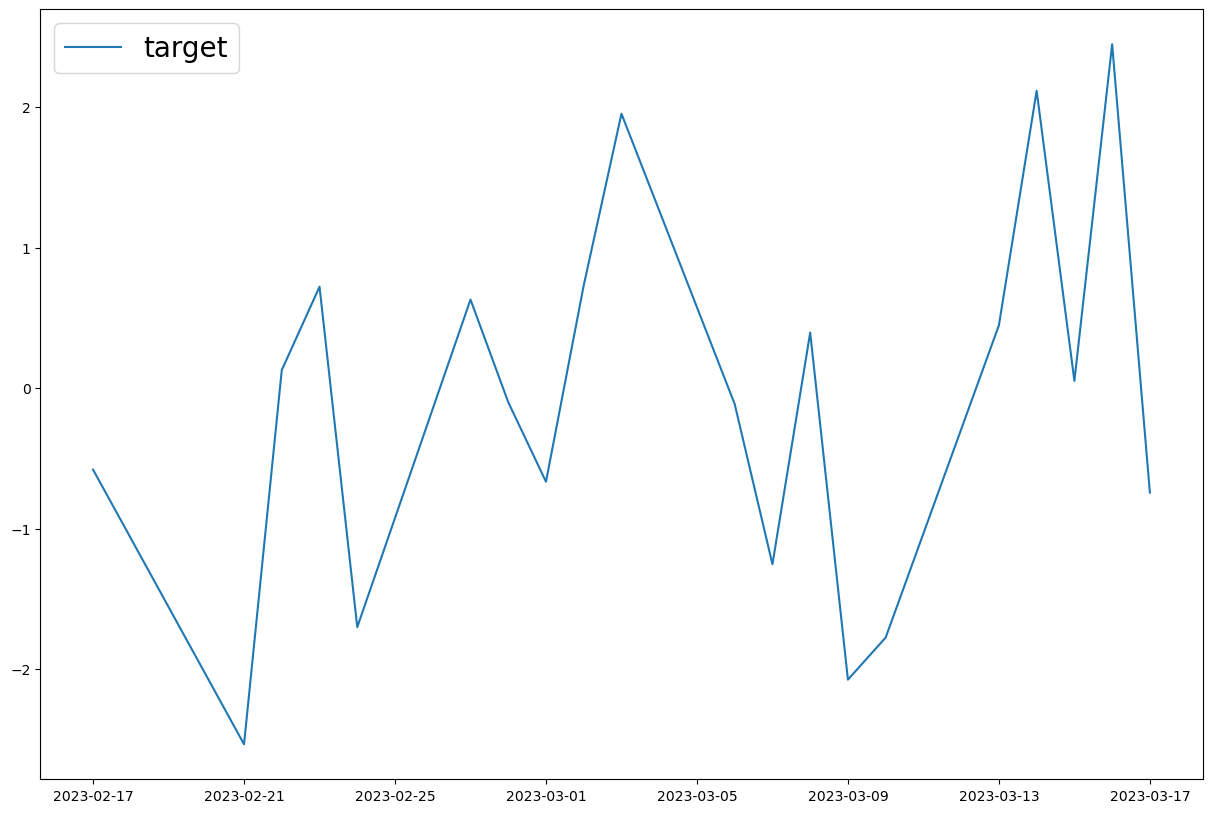

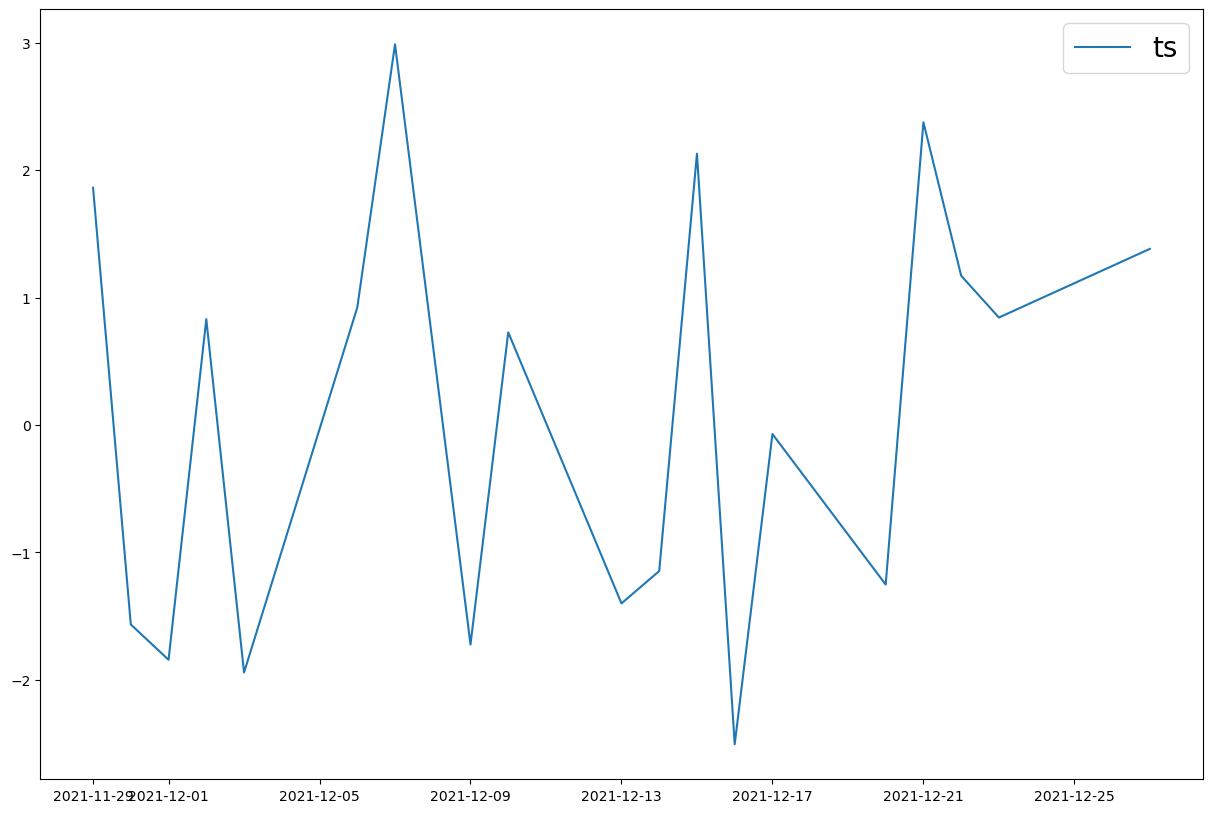

In [29]:
# 로그 수익률 그래프
plt.figure(figsize=(15,10))
plt.plot(nasdaq.tail(20).index, nasdaq_ts.tail(20)['return'], label='target')
plt.legend(fontsize=20)

plt.figure(figsize=(15,10))
plt.plot(nasdaq_ts.iloc[173:(173+20)]['Date'], nasdaq_ts.iloc[173:(173+20)]['return'], label='ts')
plt.legend(fontsize=20)

In [30]:
relate_df = []
for i in range(len(target_idx)):
    relate_df.append(nasdaq_ts.iloc[target_idx[i]:(target_idx[i]+20)]['return'])

relate_df.append(nasdaq_ts.tail(20)['return'])
relate_df

[218    0.497504
 219   -3.808224
 220    1.566968
 221   -0.585765
 222    1.267507
 223    2.063324
 224   -2.125414
 225   -2.820305
 226   -0.001671
 227    2.498027
 228   -0.110883
 229   -2.926633
 230   -1.237138
 231   -1.236951
 232   -2.604554
 233    3.290239
 234    1.627160
 235    0.413760
 236   -1.604942
 237    1.609445
 Name: return, dtype: float64,
 261   -2.285537
 262   -2.245136
 263    0.061034
 264   -1.349613
 265   -2.205159
 266   -0.301601
 267    2.013897
 268   -2.167252
 269   -0.140310
 270    2.132016
 271   -1.230699
 272   -2.091280
 273   -2.578455
 274    1.281233
 275   -4.033475
 276   -0.014496
 277    3.017529
 278   -4.260638
 279    1.619453
 280    0.221040
 Name: return, dtype: float64,
 272   -2.091280
 273   -2.578455
 274    1.281233
 275   -4.033475
 276   -0.014496
 277    3.017529
 278   -4.260638
 279    1.619453
 280    0.221040
 281    3.142619
 282   -5.120617
 283   -1.414690
 284   -4.388218
 285    0.979592
 286   -3.233172
 28

In [31]:
len(target_idx)

7

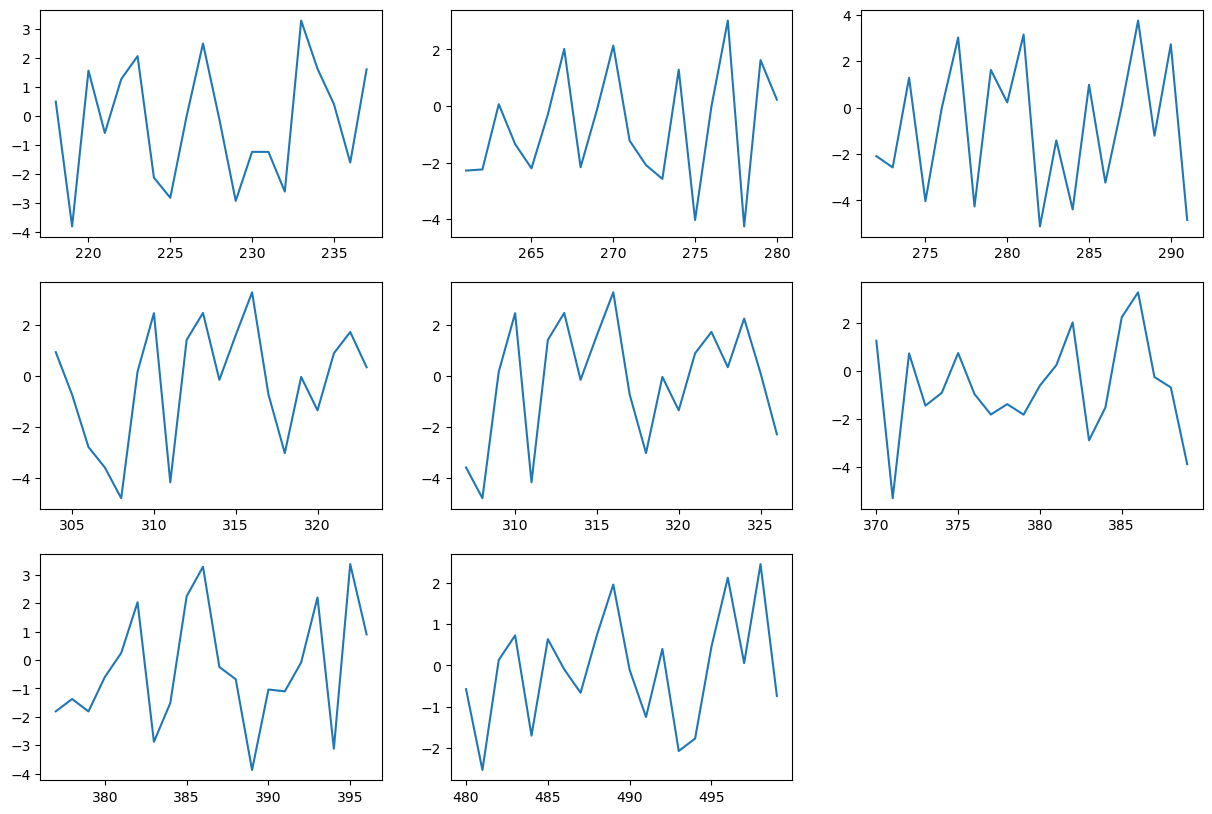

In [32]:
plt.figure(figsize=(15,10))
for i, j in enumerate(relate_df):
    plt.subplot(3,3,i+1)
    plt.plot(j)

In [33]:
return_df = []
for i in range(len(target_idx)):
    return_df.append(nasdaq_ts.iloc[(target_idx[i]+5):(target_idx[i]+15)]['return'])

return_df

[223    2.063324
 224   -2.125414
 225   -2.820305
 226   -0.001671
 227    2.498027
 228   -0.110883
 229   -2.926633
 230   -1.237138
 231   -1.236951
 232   -2.604554
 Name: return, dtype: float64,
 266   -0.301601
 267    2.013897
 268   -2.167252
 269   -0.140310
 270    2.132016
 271   -1.230699
 272   -2.091280
 273   -2.578455
 274    1.281233
 275   -4.033475
 Name: return, dtype: float64,
 277    3.017529
 278   -4.260638
 279    1.619453
 280    0.221040
 281    3.142619
 282   -5.120617
 283   -1.414690
 284   -4.388218
 285    0.979592
 286   -3.233172
 Name: return, dtype: float64,
 309    0.176722
 310    2.470091
 311   -4.167497
 312    1.419972
 313    2.478218
 314   -0.146636
 315    1.607467
 316    3.287799
 317   -0.718226
 318   -3.021532
 Name: return, dtype: float64,
 312    1.419972
 313    2.478218
 314   -0.146636
 315    1.607467
 316    3.287799
 317   -0.718226
 318   -3.021532
 319   -0.032652
 320   -1.343307
 321    0.894633
 Name: return, dtype: floa

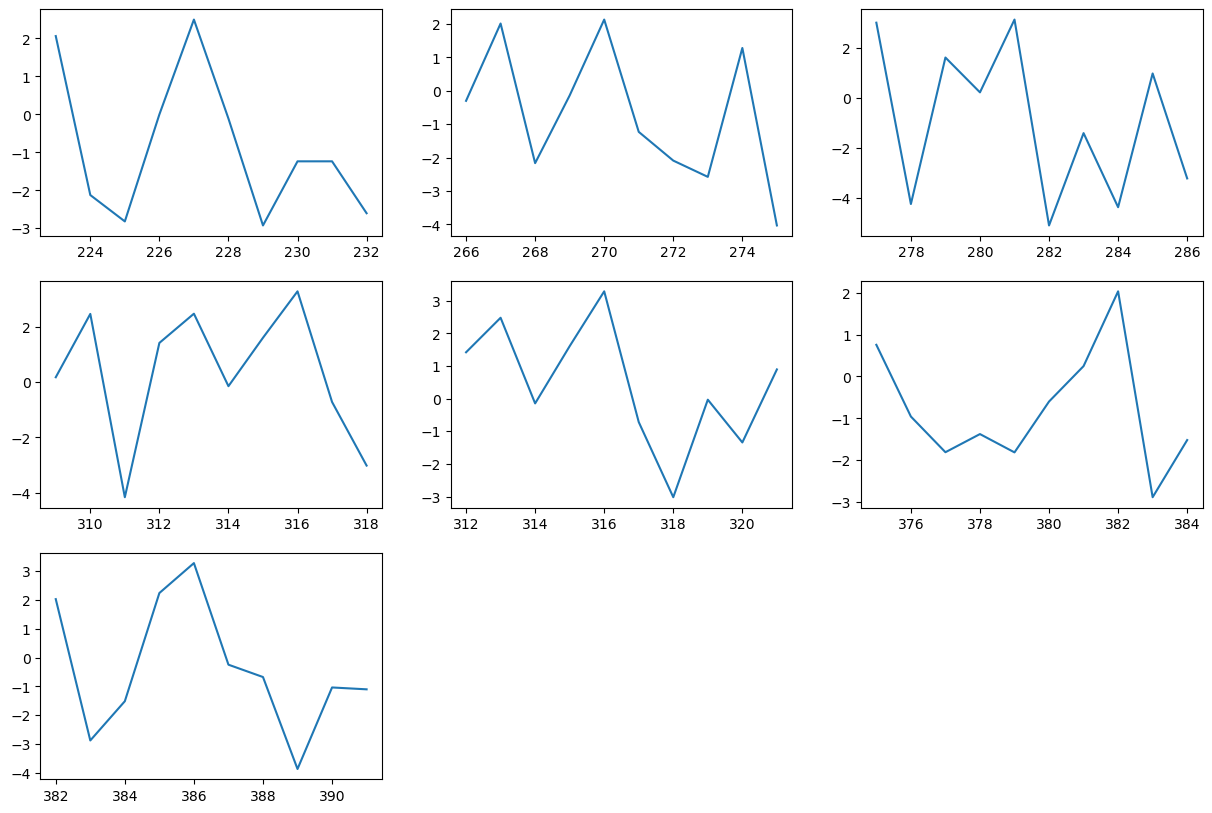

In [34]:
plt.figure(figsize=(15,10))
for i, j in enumerate(return_df):
    plt.subplot(3,3,i+1)
    plt.plot(j)

In [35]:
#표준편차 & 평균
print('표준편차: \n', pd.DataFrame(np.array(relate_df)).T.std())
print('평균 수익률: \n', pd.DataFrame(np.array(return_df)).T.mean())
#2주후 표준편차 & 평균
print('2주 후 표준편차: \n', pd.DataFrame(np.array(return_df)).T.std())
print('2주 후 평균 수익률: \n', pd.DataFrame(np.array(return_df)).T.mean())

표준편차: 
 0    2.032143
1    2.053781
2    2.906696
3    2.336127
4    2.362887
5    2.068453
6    2.082361
7    1.369146
dtype: float64
평균 수익률: 
 0   -0.850220
1   -0.711593
2   -0.943710
3    0.338638
4    0.442573
5   -0.792987
6   -0.379529
dtype: float64
2주 후 표준편차: 
 0    1.948274
1    2.076114
2    3.158616
3    2.439770
4    1.881656
5    1.446083
6    2.284167
dtype: float64
2주 후 평균 수익률: 
 0   -0.850220
1   -0.711593
2   -0.943710
3    0.338638
4    0.442573
5   -0.792987
6   -0.379529
dtype: float64
